#**TASK - 01**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('house_data.csv')

In [3]:
# Missing Value Handling

for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

In [4]:
# Check for non-numeric columns (excluding the target variable 'price')
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()

print(f"Non-numeric columns: {non_numeric_columns}")

Non-numeric columns: ['municipality_name', 'object_type_name']


In [5]:

# Convert categorical columns to numerical using one-hot encoding
if non_numeric_columns:
  df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)
# Ensure 'price' column exists
if 'price' not in df.columns:
  raise KeyError("The dataset does not contain a 'price' column. Please check the CSV file.")
# Define features (X) and target (y)
X = df.drop(columns=['price']) # Features (all except target)
y = df['price'] # Target variable
# Ensure all feature columns are numeric
if not np.issubdtype(X.dtypes.values[0], np.number):
  raise ValueError("Some features are still non-numeric. Check the dataset preprocessing.")
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train model
model = LinearRegression()
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Model Evaluation:\nMSE: {mse:.2f}, R-squared: {r2:.2f}')

Model Evaluation:
MSE: 149210817252.16, R-squared: 0.49


In [6]:
# Calculate Adjusted R-squared
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f' Adjusted R-squared: {adjusted_r2:.2f}')

 Adjusted R-squared: 0.09


**TASK - 02**

In [7]:
# Load dataset (Replace 'salary_data.csv' with an actual dataset)
df = pd.read_csv('salary_data.csv')
# Preprocess data
df.dropna(inplace=True)
# Identify categorical columns

Best parameters from grid search: {'alpha': 1.0}
MSE: 49974852.71999636, R-squared: 0.9021627846740266
Predicted Salary for sample input: 115582.53212303581
Model saved successfully!


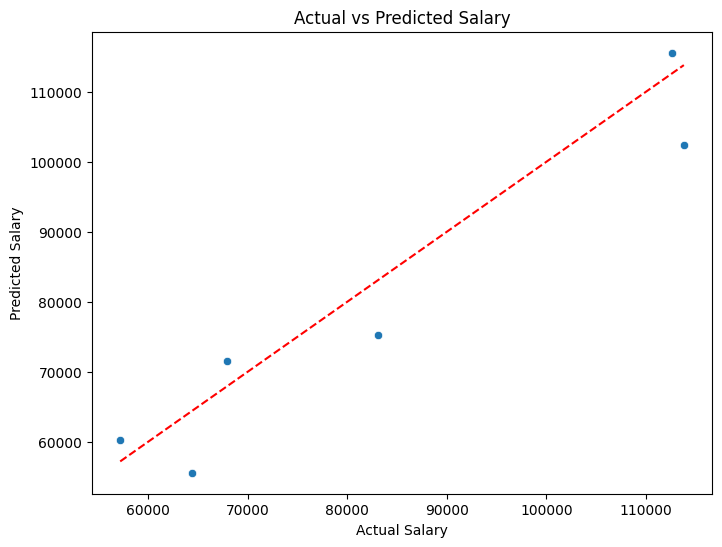

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load dataset (Replace 'salary_data.csv' with your actual dataset)
df = pd.read_csv('salary_data.csv')

# Preprocess data: Drop rows with missing values
df.dropna(inplace=True)

# Identify categorical columns and apply one-hot encoding if they exist
categorical_columns = ['degree', 'job_role', 'location']
existing_categorical_columns = [col for col in categorical_columns if col in df.columns]
if existing_categorical_columns:
    df = pd.get_dummies(df, columns=existing_categorical_columns, drop_first=True)

# Define features and target variable
if 'Salary' in df.columns:
    X = df.drop(columns=['Salary'])
    y = df['Salary']

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # --- Model Tuning ---
    # Use Ridge Regression and tune the regularization strength 'alpha' using GridSearchCV
    param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
    ridge = Ridge()
    grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    print("Best parameters from grid search:", grid_search.best_params_)

    # Use the best estimator for further predictions
    model = grid_search.best_estimator_
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'MSE: {mse}, R-squared: {r2}')

    # Example prediction using the first sample from the test set
    sample_input = X_test.iloc[[0]]  # maintain feature names
    predicted_salary = model.predict(sample_input)
    print(f'Predicted Salary for sample input: {predicted_salary[0]}')

    # --- Save the model ---
    # Save both the trained model and the feature names needed for prediction.
    model_data = {
         'model': model,
         'features': list(X.columns)
    }
    joblib.dump(model_data, 'salary_model.joblib')
    print("Model saved successfully!")

    # --- Visualization: Regression Line (optional) ---
    if 'experience' in X.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df['experience'], y=df['Salary'], alpha=0.5)
        
        # Create a range of experience values for plotting the regression line
        x_range = np.linspace(df['experience'].min(), df['experience'].max(), 100)
        # For each value in x_range, set other features to their mean
        input_df = pd.DataFrame({col: [X[col].mean()] * 100 for col in X.columns})
        input_df['experience'] = x_range
        y_line = model.predict(input_df)
        
        plt.plot(x_range, y_line, color='red', label='Regression Line')
        plt.xlabel('Experience')
        plt.ylabel('Salary')
        plt.title('Salary vs Experience with Regression Line')
        plt.legend()
        plt.show()
    else:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=y_test, y=y_pred)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel('Actual Salary')
        plt.ylabel('Predicted Salary')
        plt.title('Actual vs Predicted Salary')
        plt.show()

else:
    print("Error: The 'Salary' column is missing from the dataset.")


In [ ]:
!streamlit run salary_app.py

^C


**TASK - 03**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Function to fetch stock data and perform feature engineering
def get_stock_data(ticker):
    stock = yf.Ticker(ticker)
    df = stock.history(period='5y')
    df = df[['Close', 'Volume']].dropna()
    df['Day'] = np.arange(len(df))
    # Add a 5-day moving average (MA5) of the Close price as an additional feature
    df['MA5'] = df['Close'].rolling(window=5).mean()
    df.dropna(inplace=True)
    return df

# Load dataset for a given ticker symbol (e.g., AAPL)
ticker = 'AAPL'
df = get_stock_data(ticker)

# Define features and target variable
X = df[['Day', 'Volume', 'MA5']]
y = df['Close']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)         # number of observations
p = X_test.shape[1]     # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'MSE: {mse}, R-squared: {r2}, Adjusted R-squared: {adjusted_r2}')

# Save the trained model along with the feature names using joblib
model_data = {
    'model': model,
    'features': list(X.columns)
}
joblib.dump(model_data, 'stock_model.joblib')
print("Model saved successfully as 'stock_model.joblib'.")


MSE: 8.457743981913767, R-squared: 0.9948083075771014, Adjusted R-squared: 0.9947452505841107
Model saved successfully as 'stock_model.joblib'.


In [17]:
!streamlit run stocks_app.py

^C
